# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression Example

Linear Regression equation:

$$y = \theta_0 + \theta_1*x $$

## 1. Create Sample data

In [2]:
# For Reproducibility
np.random.seed(1)

num_instance = 200
original_theta_1, original_theta_0 = np.random.randn(2)
print(f'Original Parameters: {original_theta_0}, {original_theta_1}')
X = 2 * np.random.randn(num_instance,1)
y = original_theta_1 * X + original_theta_0 + np.random.randn(num_instance,1)

Original Parameters: -0.6117564136500754, 1.6243453636632417


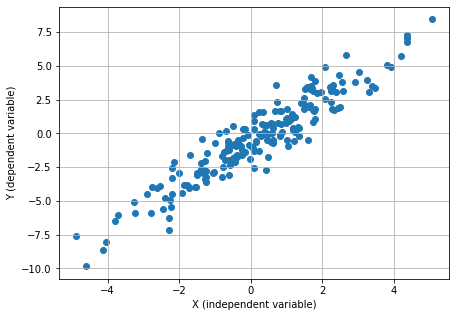

In [3]:
plt.figure(figsize=(7,5))
plt.scatter(X, y)
plt.xlabel('X (independent variable)')
plt.ylabel('Y (dependent variable)')
plt.grid(True);

## Normal Equation

Linear Regression tries to optimize the paramters $\theta$ in such a way to minimize the loss function (Mean Squared Error)


Solution for normal equation is given by: $$\hat{\theta} = (X^TX)^{-1}X^Ty$$

In [4]:
print(f'Dimension of X: {X.shape}')
bias_feature = np.ones_like(X)
print(f'Dimension of Bias Feature: {bias_feature.shape}')
X_final = np.hstack([bias_feature, X])
X_final.shape

Dimension of X: (200, 1)
Dimension of Bias Feature: (200, 1)


(200, 2)

In [5]:
theta_optimal = np.dot(np.linalg.inv(np.dot(X_final.T, X_final)) @ X_final.T, y)
print(theta_optimal)
theta_0_pred, theta_1_pred = theta_optimal[0][0], theta_optimal[1][0]

[[-0.620709  ]
 [ 1.60225146]]


In [6]:
def plot_results(X, y, theta_0_pred, theta_1_pred):
    plt.figure(figsize=(7,5))
    min_x, max_x = np.min(X), np.max(X)
    plot_points = np.linspace(start = min_x, stop = max_x, num = 100).reshape(-1,1)
    predictions = theta_0_pred + theta_1_pred*plot_points
    plt.scatter(X, y, color = 'blue', marker='x', label = 'True Points')
    plt.plot(plot_points, predictions, color = 'red', label = 'Prediction Line', linewidth = 3)
    plt.xlabel('X (independent variable)')
    plt.ylabel('Y (dependent variable)')
    plt.grid(True)
    plt.legend();

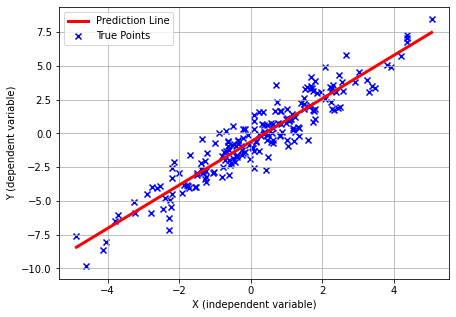

In [7]:
plot_results(X, y, theta_0_pred, theta_1_pred)

## Gradient Descent

Gradient Descent Algo:

1. set learning rate $\eta$
2. set number of epochs
3. Set parameters $\theta$ = 0
4. for epoch from 1 to num_epochs:
5. $\quad$ loss = compute_loss(y_prediction, y_true)
6. $\quad$ for each parameter $\theta_j$:
7. $\quad$ $\quad$ $\theta_j^{(new)}$ = $\theta_j^{(old)} - \eta*\nabla_{\theta_j} Loss$

In [8]:
def compute_loss(y_predictions, y_true):
    return ((y_predictions - y_true)**2).mean()

EPOCH: [100: 100]: 100%|██████████| 100/100 [00:00<00:00, 334.12it/s, loss=1.07]


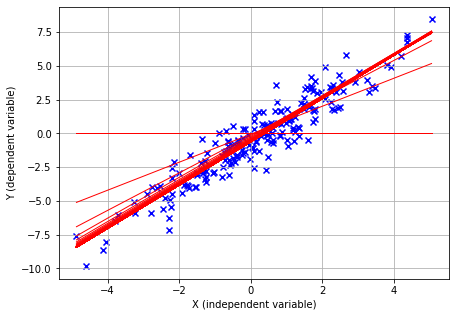

[[-0.620709  ]
 [ 1.60225146]]


In [9]:
from tqdm import tqdm
eta = 0.1
number_epochs = 100
theta_optimal = np.zeros((2, 1))
progress_bar = tqdm(range(number_epochs), total = number_epochs)

min_x, max_x = np.min(X), np.max(X)
plot_points = np.linspace(start = min_x, stop = max_x, num = 100).reshape(-1,1)
plt.figure(figsize=(7,5))
plt.xlabel('X (independent variable)')
plt.ylabel('Y (dependent variable)')
plt.grid(True)
plt.scatter(X, y, color = 'blue', marker='x', label = 'True Points')
for epoch in progress_bar:
    # Plotting Continuously
    theta_0_pred, theta_1_pred = theta_optimal[0][0], theta_optimal[1][0]
    predictions = theta_0_pred + theta_1_pred*plot_points
    plt.plot(plot_points, predictions, color = 'red', label = 'Prediction Line', linewidth = 1)


    y_pred = X_final @ theta_optimal
    loss = compute_loss(y_pred, y)
    progress_bar.set_description(f"EPOCH: [{epoch+1}: {number_epochs}]")
    progress_bar.set_postfix(loss = loss)
    gradients = 2/num_instance* (X_final.T @ (X_final @ theta_optimal - y))
    theta_optimal = theta_optimal - eta*gradients


plt.show()
print(theta_optimal)
theta_0_pred, theta_1_pred = theta_optimal[0][0], theta_optimal[1][0]

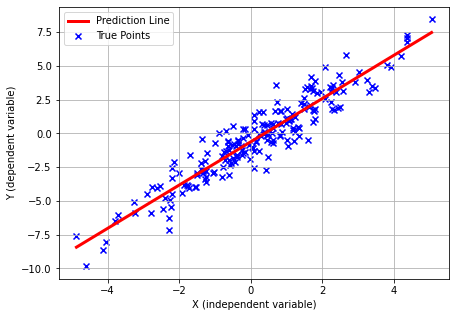

In [10]:
plot_results(X, y, theta_0_pred, theta_1_pred)

## Stochastic Gradient Descent

Gradient Descent Algo:

1. set learning rate $\eta$
2. set number of epochs
3. Set parameters $\theta$ = 0
4. for epoch from 1 to num_epochs:
5. $\quad$ for iter from 1 to num_instances:
6. $\quad$ $\quad$ Pick a random sample $(x_p, y_p)$
7. $\quad$ $\quad$ loss = compute_loss($\hat{y}_p$, $y_p$)
8. $\quad$ $\quad$ for each parameter $\theta_j$:
9. $\quad$ $\quad$ $\quad$ $\theta_j^{(new)}$ = $\theta_j^{(old)} - \eta*\nabla_{\theta_j} Loss$

EPOCH: [100: 100]: 100%|██████████| 100/100 [00:00<00:00, 128.74it/s, loss=1.25]


[[-0.64171875]
 [ 1.66464107]]


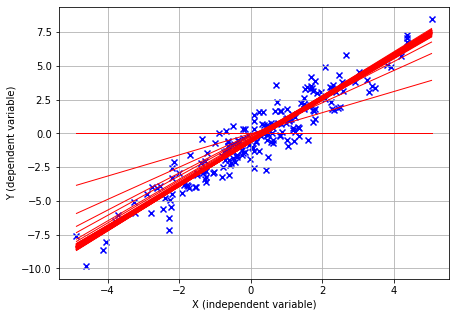

In [11]:
eta = 0.1
number_epochs = 100
theta_optimal = np.zeros((2, 1))
progress_bar = tqdm(range(number_epochs), total = number_epochs)
min_x, max_x = np.min(X), np.max(X)
plot_points = np.linspace(start = min_x, stop = max_x, num = 100).reshape(-1,1)
plt.figure(figsize=(7,5))
plt.xlabel('X (independent variable)')
plt.ylabel('Y (dependent variable)')
plt.grid(True)
plt.scatter(X, y, color = 'blue', marker='x', label = 'True Points')

for epoch in progress_bar:
    # Plotting Continuously
    theta_0_pred, theta_1_pred = theta_optimal[0][0], theta_optimal[1][0]
    predictions = theta_0_pred + theta_1_pred*plot_points
    plt.plot(plot_points, predictions, color = 'red', label = 'Prediction Line', linewidth = 1)
    
    for iter in range(num_instance):
        p = np.random.randint(num_instance)
        X_p, y_p = X_final[p:p+1], y[p:p+1]
        y_pred = X_p @ theta_optimal
        loss += compute_loss(y_pred, y_p)
        gradients = 2/num_instance* (X_p.T @ (X_p @ theta_optimal - y_p))
        theta_optimal = theta_optimal - eta*gradients

    progress_bar.set_description(f"EPOCH: [{epoch+1}: {number_epochs}]")
    loss = loss/num_instance
    progress_bar.set_postfix(loss = loss)
print(theta_optimal)
theta_0_pred, theta_1_pred = theta_optimal[0][0], theta_optimal[1][0]

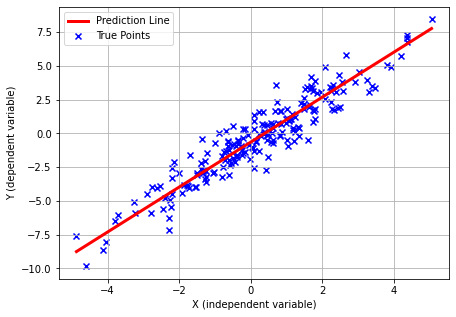

In [12]:
plot_results(X, y, theta_0_pred, theta_1_pred)

# Linear Regression using sklearn

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f'Theta_0 : {lin_reg.intercept_}')
print(f'Theta_1 : {lin_reg.coef_}')

Theta_0 : [-0.620709]
Theta_1 : [[1.60225146]]


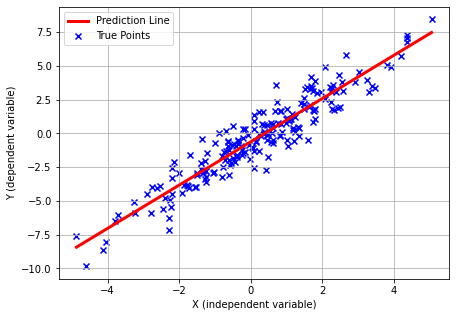

In [15]:

plt.figure(figsize=(7,5))
min_x, max_x = np.min(X), np.max(X)
plot_points = np.linspace(start = min_x, stop = max_x, num = 100).reshape(-1,1)
predictions = lin_reg.predict(plot_points)
plt.scatter(X, y, color = 'blue', marker='x', label = 'True Points')
plt.plot(plot_points, predictions, color = 'red', label = 'Prediction Line', linewidth = 3)
plt.xlabel('X (independent variable)')
plt.ylabel('Y (dependent variable)')
plt.grid(True)
plt.legend();

**Try Yourself:** Use SGD regressor